## **Single Window Momentum Trading Strategy using Nasdaq-100**
This notebook automates the process of extracting stock tickers from the Nasdaq-100 index and implements a trading strategy based on past momentum performance.

**Key Objectives:**
1. **Extract stock tickers** from the Nasdaq-100 Wikipedia page.
2. **Fetch historical stock price data** using Yahoo Finance.
3. **Analyse stock performance** to identify best and worst performers.
4. **Implement a trading strategy**: Long the best-performing stocks and short the worst-performing stocks.

This notebook provides a step-by-step approach to achieving these goals.

## **Import Required Libraries**
This cell imports essential libraries for data retrieval, processing, and visualization:
- `yfinance`: Fetches stock price data from Yahoo Finance.
- `pandas`: Handles tabular data.
- `matplotlib`: Generates visualizations.
- `numpy`: Performs numerical operations.

In [8]:
pip install yfinance pandas matplotlib numpy lxml requests

Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import requests

## **Extracting Nasdaq-100 Tickers from Wikipedia**
We use `pandas.read_html()` to extract all tables from the Wikipedia page containing Nasdaq-100 index components.
- The length of `WikipediaDTs` tells us how many tables were found on the page.
- Printing `WikipediaDTs` helps us inspect the extracted tables.

In [12]:
# get all the tables from the wikipedia page 'https://en.wikipedia.org/wiki/Nasdaq-100#Components' and write them to a pandas dataframe called WikipediaDTs
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'

# Add browser-like headers to avoid 403
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/120.0 Safari/537.36"
    )
}

# Fetch page HTML
response = requests.get(nasdaq, headers=headers, timeout=30)
response.raise_for_status()  # raises error if request failed

WikipediaDTs = pd.DataFrame()
WikipediaDTs = pd.read_html(response.text)
print(len(WikipediaDTs)) # this will tell us how many tables there are on the page
print(WikipediaDTs)

19
[                                     0  \
0   Nasdaq-100 Index from 1985 to 2015   
1                           Foundation   
2                             Operator   
3                            Exchanges   
4                       Trading symbol   
5                         Constituents   
6                                 Type   
7                           Market cap   
8                     Weighting method   
9                      Related indices   
10                             Website   

                                              1  
0            Nasdaq-100 Index from 1985 to 2015  
1                January 31, 1985; 40 years ago  
2                                  Nasdaq, Inc.  
3                                        Nasdaq  
4                                   ^NDX or NDX  
5                                           102  
6                                     Large-cap  
7   US$33.70 trillion (as of December 10, 2025)  
8            Free-float capitalization-we

C:\Users\samih\AppData\Local\Temp\ipykernel_32156\1172033005.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  WikipediaDTs = pd.read_html(response.text)


## **Checking the Correct Table for Nasdaq-100 Components**
To work out which table has the names and tickers, we can simply cycle through them manually (it's like opening x-mas pressies).

Since multiple tables exist on the page, we print `WikipediaDTs[4]` to check if it contains the Nasdaq-100 tickers.

In [13]:
print(WikipediaDTs[3]) # this isn't it!

    Year  Closing level Change in Index in Points Change in Index in %
0   1985         132.29                       NaN                  NaN
1   1986         141.41                      9.12                 6.89
2   1987         156.25                     14.84                10.49
3   1988         177.41                     21.16                13.54
4   1989         223.84                     46.43                26.17
5   1990         200.53                    −23.31               −10.41
6   1991         330.86                    130.33                64.99
7   1992         360.19                     29.33                 8.86
8   1993         398.28                     38.09                10.57
9   1994         404.27                      5.99                 1.50
10  1995         576.23                    171.96                42.54
11  1996         821.36                    245.13                42.54
12  1997         990.80                    169.44                20.63
13  19

In [14]:
WikipediaDTs[4] # here it is!

,Ticker,Company,ICB Industry[14],ICB Subsector[14]
0,ADBE,Adobe Inc.,Technology,Computer Software
1,AMD,Advanced Micro Devices,Technology,Semiconductors
2,ABNB,Airbnb,Consumer Discretionary,Diversified Commercial Services
3,ALNY,Alnylam Pharmaceuticals,Health Care,Biotechnology
4,GOOGL,Alphabet Inc. (Class A),Technology,Computer Software
...,...,...,...,...
96,WBD,Warner Bros. Discovery,Consumer Discretionary,Miscellaneous Amusement & Recreation Services
97,WDC,Western Digital,Technology,Electronic Components
98,WDAY,"Workday, Inc.",Technology,EDP Services
99,XEL,Xcel Energy,Utilities,Power Generation


## **Extracting Stock Ticker Symbols into a List**
From the selected table, we extract the column containing **ticker symbols** and store them in `tickersLIST`.
This list will be used to fetch stock price data.

In [15]:
# now we need to get the tickers from the table and put them in a list called tickersLIST
tickersLIST = WikipediaDTs[4]['Ticker'].tolist() # this is a list
tickersLIST

['ADBE',
 'AMD',
 'ABNB',
 'ALNY',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AEP',
 'AMGN',
 'ADI',
 'AAPL',
 'AMAT',
 'APP',
 'ARM',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'ADP',
 'AXON',
 'BKR',
 'BKNG',
 'AVGO',
 'CDNS',
 'CHTR',
 'CTAS',
 'CSCO',
 'CCEP',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DASH',
 'EA',
 'EXC',
 'FAST',
 'FER',
 'FTNT',
 'GEHC',
 'GILD',
 'HON',
 'IDXX',
 'INSM',
 'INTC',
 'INTU',
 'ISRG',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LIN',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MSTR',
 'MDLZ',
 'MPWR',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'PCAR',
 'PLTR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROP',
 'ROST',
 'STX',
 'SHOP',
 'SBUX',
 'SNPS',
 'TMUS',
 'TTWO',
 'TSLA',
 'TXN',
 'TRI',
 'VRSK',
 'VRTX',
 'WBD',
 'WDC',
 'WDAY',
 'XEL',
 'ZS']

## **Fetching Stock Data from Yahoo Finance**
Now that we have the stock tickers, we use `yfinance` to fetch historical stock price data.
- The data will be used to analyse past performance.
- We focus on key metrics such as returns to determine the best and worst performers.

In [16]:
#download from yahoo finance the historical data for all tickers in the list and put it in a single dataframe called hPricesDT
hPricesDT = pd.DataFrame()
hPricesDT = yf.download(tickersLIST, start='2010-07-01', end='2021-06-30')['Close']
hPricesDT

[***********           22%                       ]  22 of 101 completed$GEHC: possibly delisted; no price data found  (1d 2010-07-01 -> 2021-06-30) (Yahoo error = "Data doesn't exist for startDate = 1277956800, endDate = 1625025600")
[******************    37%                       ]  37 of 101 completed$ARM: possibly delisted; no price data found  (1d 2010-07-01 -> 2021-06-30) (Yahoo error = "Data doesn't exist for startDate = 1277956800, endDate = 1625025600")
[**********************58%***                    ]  59 of 101 completed$CEG: possibly delisted; no price data found  (1d 2010-07-01 -> 2021-06-30) (Yahoo error = "Data doesn't exist for startDate = 1277956800, endDate = 1625025600")
[*********************100%***********************]  101 of 101 completed

3 Failed downloads:
['GEHC', 'ARM', 'CEG']: possibly delisted; no price data found  (1d 2010-07-01 -> 2021-06-30) (Yahoo error = "Data doesn't exist for startDate = 1277956800, endDate = 1625025600")


Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALNY,AMAT,AMD,...,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,WDC,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,7.452175,NaN,26.660000,19.586458,24.245819,24.570000,17.832964,15.040000,9.349629,7.390000,...,1.464000,8.850000,15.412807,28.863602,32.299999,18.441492,NaN,18.726858,12.192386,NaN
2010-07-02,7.405988,NaN,26.730000,19.551392,24.074862,24.309999,17.927053,15.170000,9.349629,7.170000,...,1.280000,9.010000,15.372896,28.796696,32.220001,18.083801,NaN,18.255363,12.245603,NaN
2010-07-06,7.456676,NaN,26.340000,19.565424,24.062658,24.049999,18.408579,15.060000,9.178213,7.040000,...,1.074000,8.910000,15.379541,28.720236,32.169998,18.206438,NaN,18.055885,12.393425,NaN
2010-07-07,7.757783,NaN,26.790001,20.652777,24.551119,24.730000,19.022928,15.420000,9.497664,7.390000,...,1.053333,9.750000,16.131226,28.271036,33.040001,18.533470,NaN,18.908207,12.635854,NaN
2010-07-08,7.740386,NaN,26.850000,20.400242,24.648802,24.610001,19.244326,15.650000,9.435332,7.370000,...,1.164000,9.390000,16.111271,28.108561,33.799999,18.564129,NaN,19.077463,12.771851,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,130.566452,151.580002,574.229980,151.225128,177.721222,283.670013,70.045334,174.630005,130.234497,83.820000,...,218.856674,171.880005,163.327591,166.858704,187.520004,29.510000,238.690002,52.135609,57.311520,218.860001
2021-06-24,130.283249,150.729996,578.260010,154.376617,178.495041,286.959991,70.214844,173.679993,132.887238,86.099998,...,226.606674,175.059998,165.530441,168.423325,191.940002,30.320000,241.710007,52.549744,57.337471,219.639999
2021-06-25,129.990311,149.669998,579.659973,154.949631,179.660217,288.739990,71.842010,175.389999,130.897690,85.620003,...,223.956665,173.820007,165.144302,169.774094,194.339996,30.860001,243.000000,53.272591,58.064346,218.839996


## **Calculating Stock Performance**
We compute returns over a selected single period to rank stocks based on performance.
- The top performers will be considered for **long positions**.
- The worst performers will be considered for **short positions**.

First, we we need to clean the data and remove NaN values from our DataFrame.

In [17]:
# identify any tickers with NaN values and list them in a list called tickersNaN
tickersNaN = []
for ticker in tickersLIST:
    if hPricesDT[ticker].isnull().values.any() == True:
        tickersNaN.append(ticker)
hPricesDT.drop(tickersNaN, axis=1, inplace=True) # drop the tickers with NaN values from the dataframe hPricesDT


hPricesDT

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALNY,AMAT,AMD,AMGN,...,TMUS,TRI,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,7.452175,26.660000,19.586458,24.245819,24.570000,17.832964,15.040000,9.349629,7.390000,35.429550,...,13.495830,24.009632,1.464000,8.850000,15.412807,28.863602,32.299999,18.441492,18.726858,12.192386
2010-07-02,7.405988,26.730000,19.551392,24.074862,24.309999,17.927053,15.170000,9.349629,7.170000,35.211613,...,13.287710,24.002964,1.280000,9.010000,15.372896,28.796696,32.220001,18.083801,18.255363,12.245603
2010-07-06,7.456676,26.340000,19.565424,24.062658,24.049999,18.408579,15.060000,9.178213,7.040000,34.939178,...,13.335735,24.183033,1.074000,8.910000,15.379541,28.720236,32.169998,18.206438,18.055885,12.393425
2010-07-07,7.757783,26.790001,20.652777,24.551119,24.730000,19.022928,15.420000,9.497664,7.390000,35.007282,...,13.848035,24.509830,1.053333,9.750000,16.131226,28.271036,33.040001,18.533470,18.908207,12.635854
2010-07-08,7.740386,26.850000,20.400242,24.648802,24.610001,19.244326,15.650000,9.435332,7.370000,35.572578,...,14.424369,24.643221,1.164000,9.390000,16.111271,28.108561,33.799999,18.564129,19.077463,12.771851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,130.566452,574.229980,151.225128,177.721222,283.670013,70.045334,174.630005,130.234497,83.820000,206.898148,...,140.114334,91.568329,218.856674,171.880005,163.327591,166.858704,187.520004,29.510000,52.135609,57.311520
2021-06-24,130.283249,578.260010,154.376617,178.495041,286.959991,70.214844,173.679993,132.887238,86.099998,208.839600,...,140.665039,91.540237,226.606674,175.059998,165.530441,168.423325,191.940002,30.320000,52.549744,57.337471
2021-06-25,129.990311,579.659973,154.949631,179.660217,288.739990,71.842010,175.389999,130.897690,85.620003,210.339081,...,140.413818,92.036613,223.956665,173.820007,165.144302,169.774094,194.339996,30.860001,53.272591,58.064346


## **Executing the Trading Strategy**
Based on our analysis, we implement the strategy:
- **Long positions**: Buy the best-performing stocks.
- **Short positions**: Sell (short) the worst-performing stocks.

This strategy aims to capitalise on momentum trends in stock prices.

In [18]:
print (tickersNaN)

['ABNB', 'APP', 'ARM', 'TEAM', 'CEG', 'CRWD', 'DDOG', 'FANG', 'DASH', 'FER', 'GEHC', 'KHC', 'META', 'NXPI', 'PLTR', 'PANW', 'PYPL', 'PDD', 'SHOP', 'WDAY', 'ZS']


In [20]:
# set signal period and convert to timestamps
signal_start_date = '2015-07-01'
print(signal_start_date)
signal_start_date = pd.Timestamp(signal_start_date)
print(signal_start_date)

# set signgal_end_date to be 1 year after signal_start_date
signal_end_date = signal_start_date + pd.DateOffset(years=1) + pd.DateOffset(days=-1)
print(signal_end_date)

# create a dataframe called signalDT that contains the prices for the signal period
signalDT = pd.DataFrame()
signalDT = hPricesDT[signal_start_date:signal_end_date]
print(hPricesDT[signal_start_date+pd.DateOffset(days=-5):signal_start_date+pd.DateOffset(days=+5)]['AAPL'])

# convert the prices to index values and put them in a dataframe called signalIndexDT
signalIndexDT = pd.DataFrame()
signalIndexDT = signalDT / signalDT.iloc[0]
print(signalIndexDT[signal_start_date+pd.DateOffset(days=-5):signal_start_date+pd.DateOffset(days=+5)]['AAPL'])

# reset the signal dates to the first and last dates in the signalIndexDT dataframe index (noting that holidays and weekends will be skipped)
signal_start_date = signalIndexDT.index[0]
signal_end_date = signalIndexDT.index[-1]
print(signal_start_date)
print(signal_end_date)
print(signalIndexDT[signal_end_date:signal_end_date]['AAPL'])


2015-07-01
2015-07-01 00:00:00
2016-06-30 00:00:00
Date
2015-06-26    28.328154
2015-06-29    27.831993
2015-06-30    28.033138
2015-07-01    28.294628
2015-07-02    28.258877
2015-07-06    28.160534
Name: AAPL, dtype: float64
Date
2015-07-01    1.000000
2015-07-02    0.998736
2015-07-06    0.995261
Name: AAPL, dtype: float64
2015-07-01 00:00:00
2016-06-30 00:00:00
Date
2016-06-30    0.770596
Name: AAPL, dtype: float64


In [23]:
# create a list of the 5 tickers with the highest index numbers at the end of the period
top5 = signalIndexDT.iloc[-1].nlargest(5).index.tolist()

# create a list of the 5 tickers with the lowest index numbers at the end of the period
bottom5 = signalIndexDT.iloc[-1].nsmallest(5).index.tolist()

# create a list of the other tickers
otherTickers = signalIndexDT.columns.tolist()
for ticker in top5:
    otherTickers.remove(ticker)
for ticker in bottom5:
    otherTickers.remove(ticker)

top5, bottom5


(['NVDA', 'AMD', 'AMZN', 'IDXX', 'XEL'],
 ['INSM', 'ALNY', 'STX', 'WDC', 'VRTX'])

## **Visualizing Stock Performance**
Using `matplotlib`, we generate visualisations to analyse performance trends of selected stocks.
- This helps us understand historical price movements before making trading decisions.

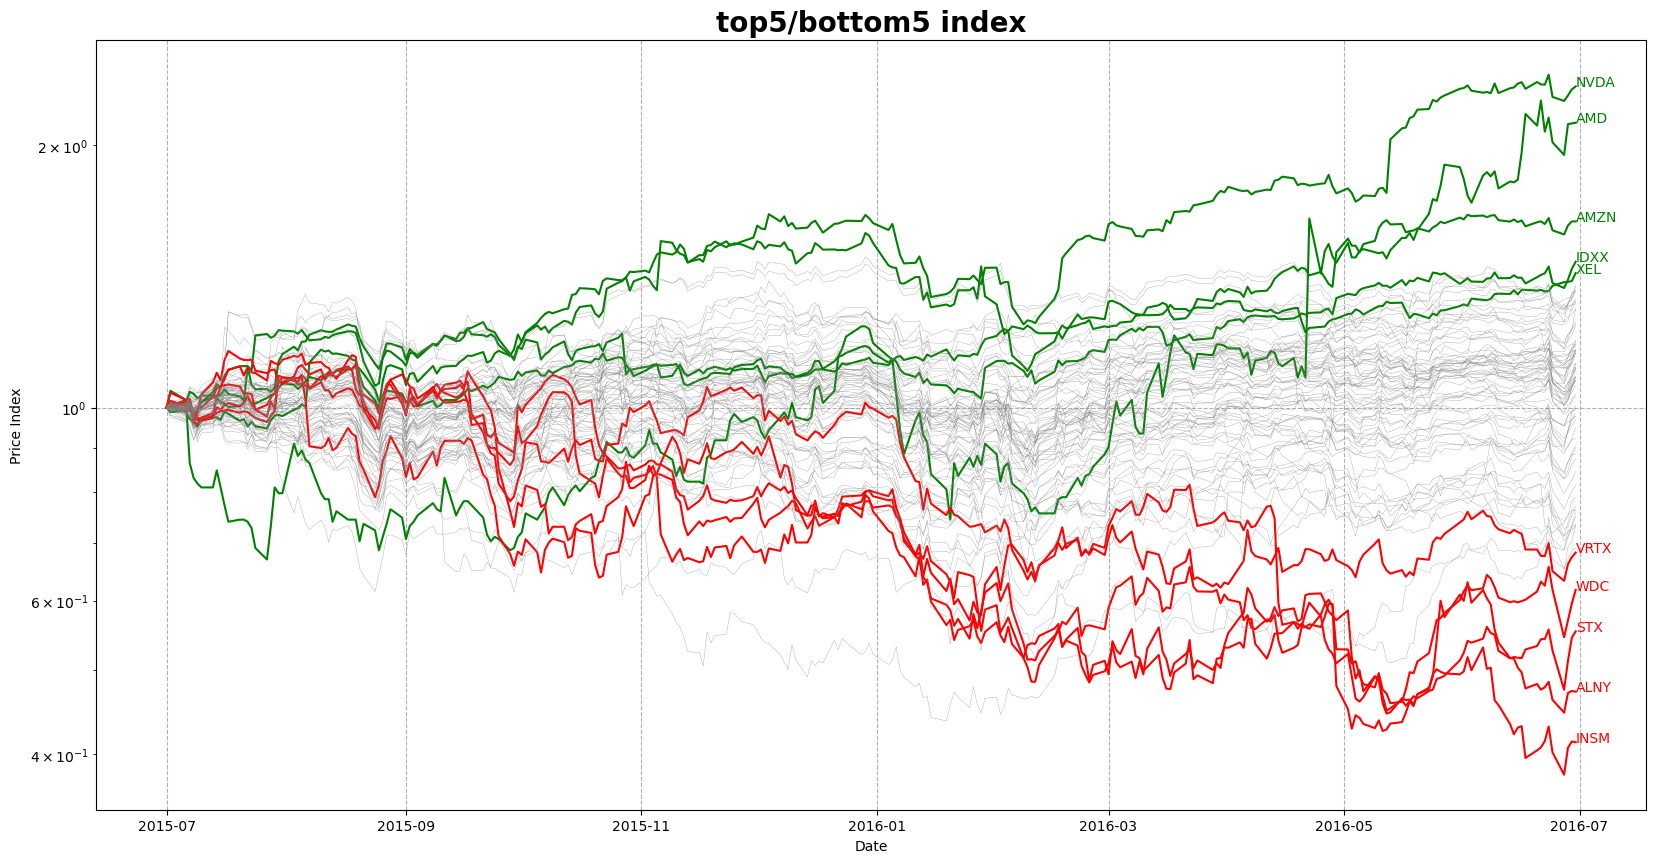

In [24]:
# plot the index for all tickers in the dataframe hPricesIDX
plt.figure(figsize=(20,10))
for ticker in top5:
    plt.plot(signalIndexDT[ticker], color='green')
    plt.text(signalIndexDT.index[-1], signalIndexDT[ticker].iloc[-1], ticker, color='green')
for ticker in bottom5:
    plt.plot(signalIndexDT[ticker], color='red')
    plt.text(signalIndexDT.index[-1], signalIndexDT[ticker].iloc[-1], ticker, color='red')
for ticker in otherTickers:
    plt.plot(signalIndexDT[ticker], color='grey', linewidth='0.2')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title('top5/bottom5 index', fontsize=20, fontweight='bold')
# use a log scale for the y axis
plt.yscale('log')
# plot gridlines
plt.grid(which='major', axis='both', linestyle='--')


plt.show()


## **Evaluating Strategy Performance**
We will evaluate the strength of our strategy on **unseen** data. That is, we have determined which stocks outperform and underperform in 07/2015 to 07/2016 and will then track our portfolio over the following two years based on the historical results. 

In this way, we have no 'look ahead bias', which is important!

In [25]:
#set up long portfolio
opening_portfolio_value = 1000000

# create a list of the prices in hPricesDT for top5
top5Prices = []
top5Prices = signalDT.iloc[-1][top5].tolist()
print(top5Prices)

# set top5Weights to be the portfolio size divided by the prices in top5Prices
top5shareCount = []
top5shareCount = opening_portfolio_value / 5 / np.array(top5Prices)


#hPricesDT.iloc[signal_end_index][top5]
longPORTinput = {'Ticker': top5, 'Price': top5Prices, 'ShareCount': top5shareCount}
longPORT = pd.DataFrame(longPORTinput)
# set the index of longPORT to be the tickers
longPORT.set_index('Ticker', inplace=True)
longPORT


# check the opening value of the portfolio
currentValue = longPORT['Price'] * longPORT['ShareCount']
print('Total value of the portfolio is: ', currentValue.sum())

longPORT


[1.1538612842559814, 5.139999866485596, 35.78099822998047, 92.86000061035156, 33.43170166015625]
Total value of the portfolio is:  1000000.0


,Price,ShareCount
Ticker,,
NVDA,1.153861,173331.060439
AMD,5.140000,38910.506847
AMZN,35.780998,5589.558981
IDXX,92.860001,2153.779870
XEL,33.431702,5982.345800


In [26]:
bottom5Prices = []
bottom5Prices = signalDT.iloc[-1][bottom5].tolist()
bottom5shareCount = []
bottom5shareCount = opening_portfolio_value / 5 / np.array(bottom5Prices)
shortPORTinput = {'Ticker': bottom5, 'Price': bottom5Prices, 'ShareCount': bottom5shareCount}
shortPORT = pd.DataFrame(shortPORTinput)
shortPORT.set_index('Ticker', inplace=True)

# check the opening value of the portfolio
currentValue = shortPORT['Price'] * shortPORT['ShareCount']
print('Total value of the portfolio is: ', currentValue.sum())

shortPORT

Total value of the portfolio is:  1000000.0


,Price,ShareCount
Ticker,,
INSM,9.860000,20283.976366
ALNY,55.490002,3604.252910
STX,16.107689,12416.430513
WDC,31.387121,6372.040262
VRTX,86.019997,2325.040779


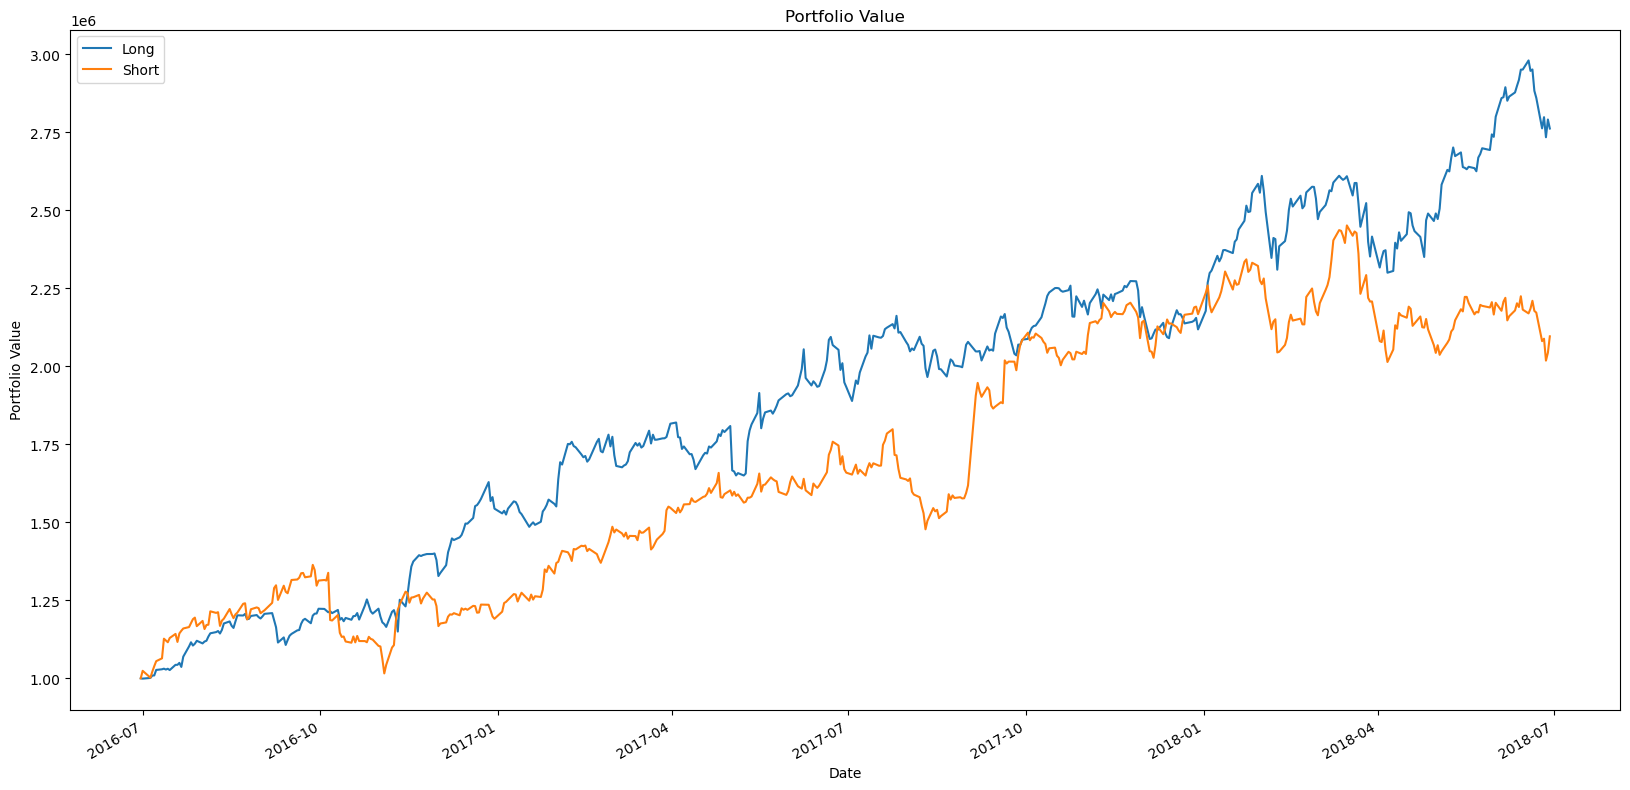

In [27]:
# define trading_start_date and tranding_end_date
trading_start_date = signal_end_date
# set trading_end_date to be 2 year after trading_start_date
trading_end_date = trading_start_date + pd.DateOffset(years=2)

# calculate portfolio values during the trading period
longPORT_values = hPricesDT[trading_start_date:trading_end_date][top5]*longPORT['ShareCount']
shortPORT_values = hPricesDT[trading_start_date:trading_end_date][bottom5]*shortPORT['ShareCount']

#chart the performance of the long and short portfolios
longPORT_values['Total'] = longPORT_values.sum(axis=1)
shortPORT_values['Total'] = shortPORT_values.sum(axis=1)
longPORT_values['Total'].plot(figsize=(20,10))
shortPORT_values['Total'].plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value')
plt.legend(['Long', 'Short'])